# Sequence analysis

In [20]:
library(TraMineR)
library(cluster)

In [21]:
data(mvad)
help(mvad)

mvad                 package:TraMineR                  R Documentation

_E_x_a_m_p_l_e _d_a_t_a _s_e_t: _T_r_a_n_s_i_t_i_o_n _f_r_o_m _s_c_h_o_o_l _t_o _w_o_r_k

_D_e_s_c_r_i_p_t_i_o_n:

     The data comes from a study by McVicar and Anyadike-Danes on
     transition from school to work. The data consist of static
     background characteristics and a time series sequence of 72
     monthly labour market activities for each of 712 individuals in a
     cohort survey. The individuals were followed up from July 1993 to
     June 1999. The monthly states are recorded in columns 15
     (‘Jul.93’) to 86 (‘Jun.99’).

     States are:

       ‘employment’   (EM)                   
       ‘FE’           further education (FE) 
       ‘HE’           higher education (HE)  
       ‘joblessness’  (JL)                   
       ‘school’       (SC)                   
       ‘training’     (TR)                   
      
     The data set contains also ids (‘id’) and sample weights
     (‘weight’) as well as the following binary covariates:
     ‘male’
     ‘catholic’
     ‘Belfast’, ‘N.Eastern’, ‘Southern’, ‘S.Eastern’, ‘Western’
     (location of school, one of five Education and Library Board areas
     in Northern Ireland)
     ‘Grammar’ (type of secondary education, 1=grammar school)
     ‘funemp’ (father's employment status at time of survey, 1=father
     unemployed)
     ‘gcse5eq’ (qualifications gained by the end of compulsory
     education, 1=5+ GCSEs at grades A-C, or equivalent)
     ‘fmpr’ (SOC code of father's current or most recent job, 1=SOC1
     (professional, managerial or related))
     ‘livboth’ (living arrangements at time of first sweep of survey
     (June 1995), 1=living with both parents)

_U_s_a_g_e:

     data(mvad)
     
_F_o_r_m_a_t:

     A data frame containing 712 rows, 72 state variables, 1 id
     variable and 13 covariates.

_S_o_u_r_c_e:

     McVicar and Anyadike-Danes (2002)

_R_e_f_e_r_e_n_c_e_s:

     McVicar, Duncan and Anyadike-Danes, Michael (2002). Predicting
     Successful and Unsuccessful Transitions from School to Work by
     Using Sequence Methods, _Journal of the Royal Statistical Society.
     Series A (Statistics in Society)_, 165, 2, pp. 317-334.

In [5]:
mvad.labels <- c("Employment", "Further education", "Higher education",
                 "Joblessness", "School", "Training")
mvad.scode <- c("EM", "FE", "HE", "JL", "SC", "TR")
mvad.seq <- seqdef(mvad, 17:86, states = mvad.scode, labels = mvad.labels)

 [>] state coding:

       [alphabet]  [label]  [long label] 

     1  FE          EM       Employment

     2  HE          FE       Further education

     3  employment  HE       Higher education

     4  joblessness JL       Joblessness

     5  school      SC       School

     6  training    TR       Training

 [>] 712 sequences in the data set

 [>] min/max sequence length: 70/70



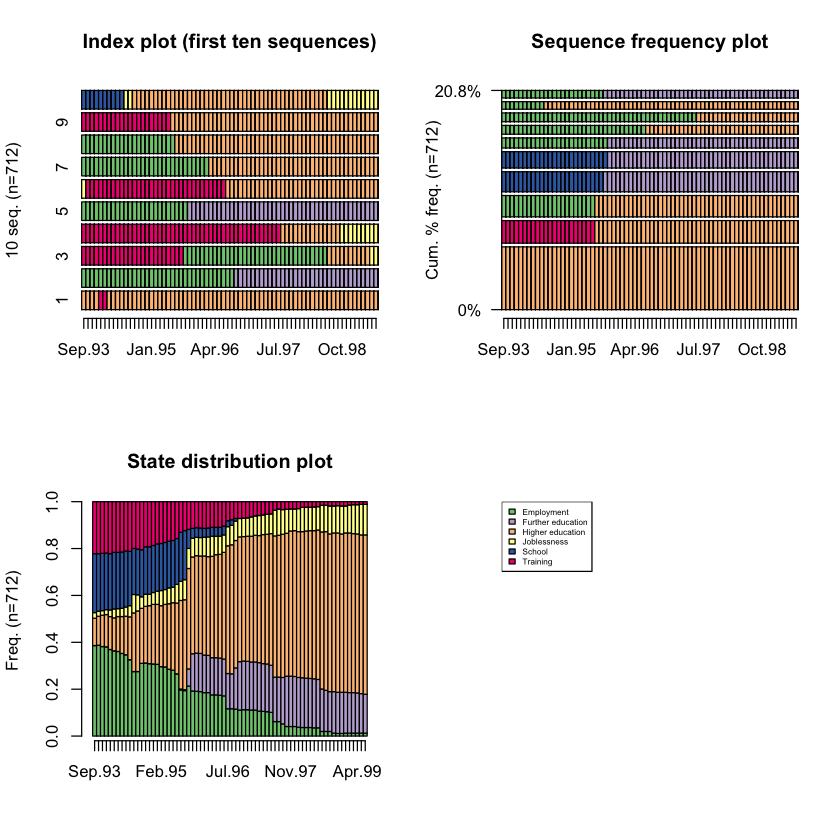

In [8]:
par(mfrow = c(2, 2))
{
  seqiplot(mvad.seq,            with.legend = F, main = "Index plot (first ten sequences)")
  seqfplot(mvad.seq, pbarw = T, with.legend = F, main = "Sequence frequency plot")
  seqdplot(mvad.seq,            with.legend = F, main = "State distribution plot")
  seqlegend(mvad.seq, cex = 0.5)
}

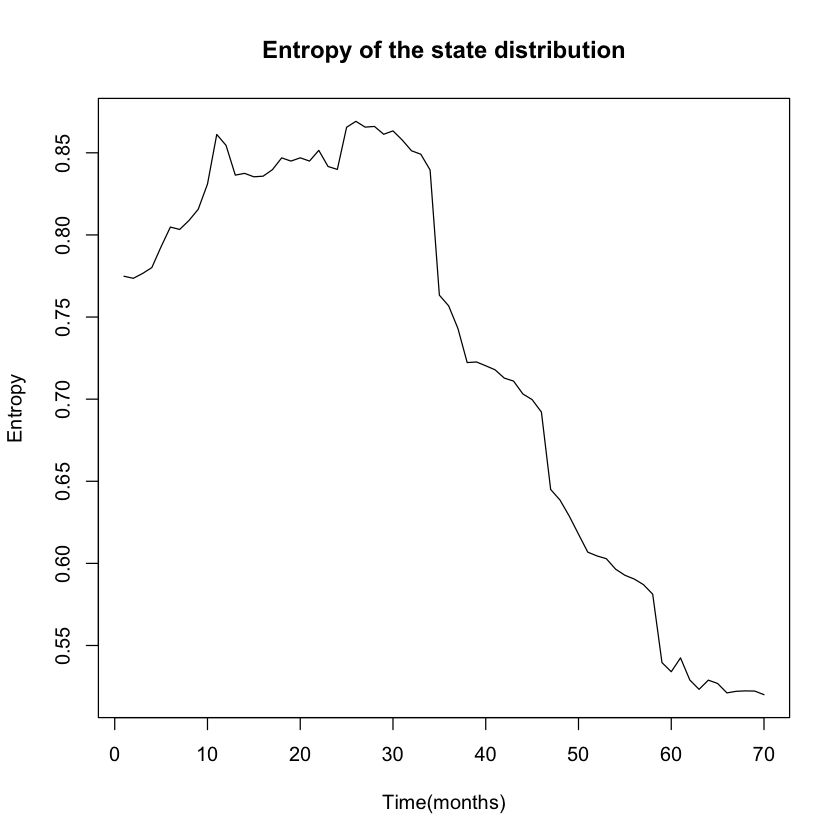

In [17]:
par(mfrow = c(1, 1))
{
  Entropy <- seqstatd(mvad.seq)$Entropy
  plot(Entropy, 
       main = "Entropy of the state distribution",
       col  = "black",
       xlab = "Time(months)",
       ylab = "Entropy",
       type = 'l')
}

In [10]:
submat <- seqsubm(mvad.seq, method = "TRATE")
dist.om1 <- seqdist(mvad.seq, method = "OM", indel = 1, sm = submat)

 [>] creating substitution-cost matrix using transition rates ...

 [>] computing transition probabilities for states EM/FE/HE/JL/SC/TR ...

 [>] 712 sequences with 6 distinct states

 [>] checking 'sm' (size and triangle inequality)

 [>] 490 distinct  sequences 

 [>] min/max sequence lengths: 70/70

 [>] computing distances using the OM metric

 [>] elapsed time: 1.429 secs



In [19]:
clusterward1 <- agnes(dist.om1, diss = TRUE, method = "ward")
par(mfrow = c(1, 1))

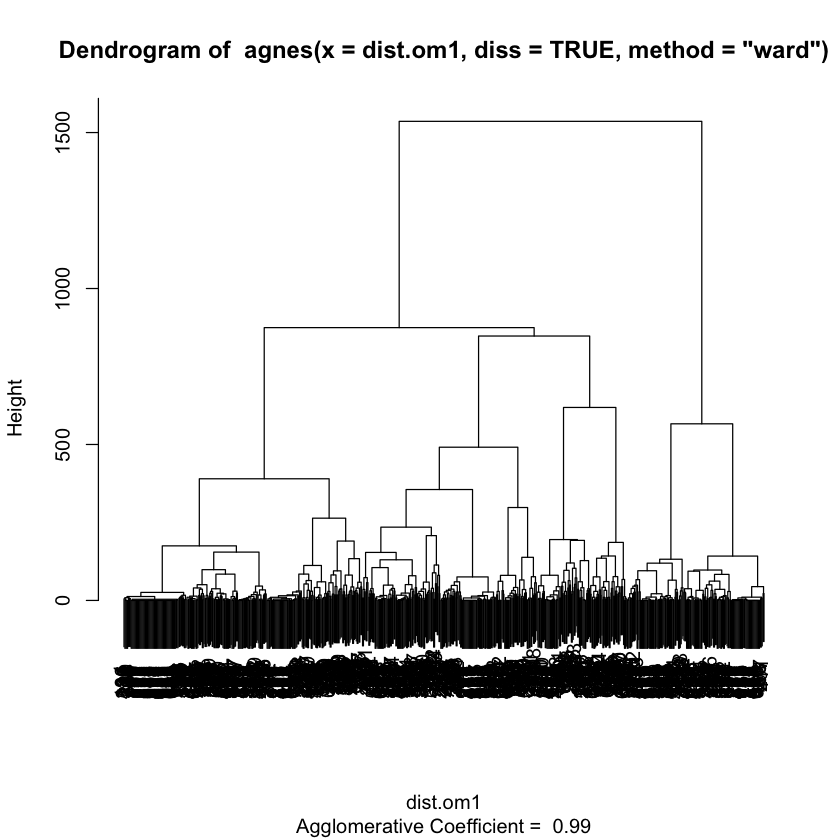

In [13]:
plot(clusterward1, which.plot = 2)

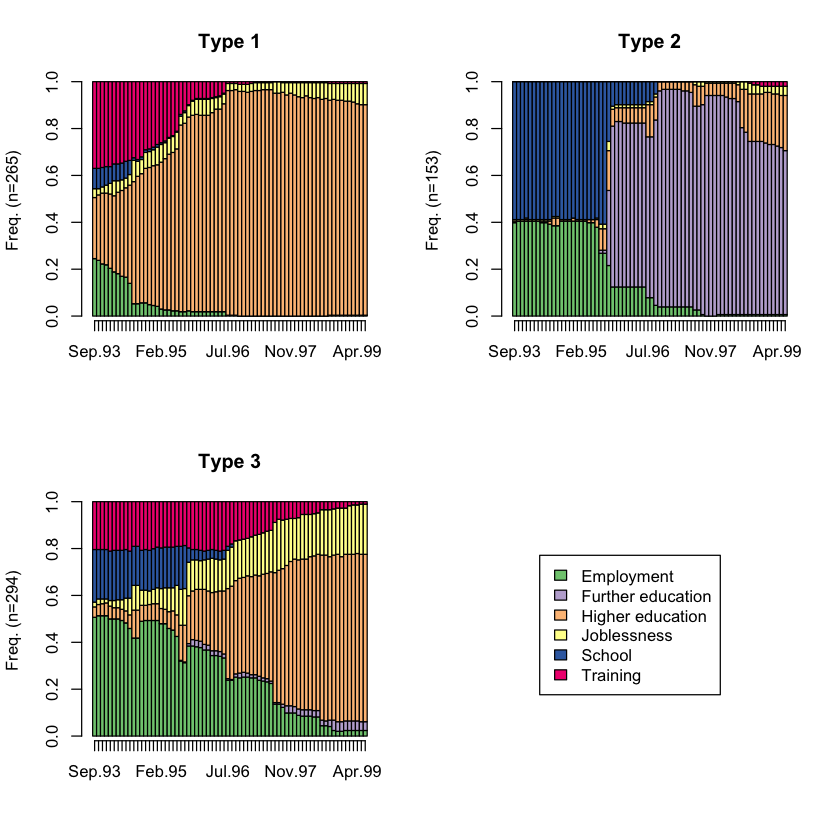

In [14]:
cluster3 <- cutree(clusterward1, k = 3)
cluster3fac <- factor (cluster3, labels = c("Type 1", "Type 2", "Type 3"))
seqdplot(mvad.seq, group = cluster3fac)